In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
data = pd.read_csv('Loan_Data.csv')
display(data.head())
print(f"Dataset Rows: {data.shape[0]}\nDataset Cols: {data.shape[1]}")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Dataset Rows: 614
Dataset Cols: 13


In [3]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
cat = data.select_dtypes(include = ['category', 'object'])
num = data.select_dtypes(include = 'number')
display(cat.head())
display(num.head())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [5]:
data['Dependents'] = data['Dependents'].str.replace('+','')
data['Dependents'] = data['Dependents'].astype(float)
data['Dependents'].dtypes

dtype('float64')

In [6]:
cat = data.select_dtypes(include = ['category', 'object'])
num = data.select_dtypes(include = 'number')
display(cat.head())
display(num.head())

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849,0.0,NaN,360.0,1.0
1,1.0,4583,1508.0,128.0,360.0,1.0
2,0.0,3000,0.0,66.0,360.0,1.0
3,0.0,2583,2358.0,120.0,360.0,1.0
4,0.0,6000,0.0,141.0,360.0,1.0


In [7]:
for i in data.columns:
    if data[i].dtypes == 'O':
        data[i].fillna(data[i].mode()[0], inplace = True)
    elif data[i].dtypes == 'float':
        data[i].fillna(data[i].median(), inplace = True)
    else:
        data[i].fillna(data[i].median(), inplace = True)

data.isnull().sum().sort_values(ascending = False).head(2)

Loan_ID    0
Gender     0
dtype: int64

In [8]:
train_data = data.iloc[:580]
test_data = data.iloc[580:]

test_data.to_csv('loan_testData.csv')

# Drop LoanID and Transform the Dependents back to Integer
train_data.drop('Loan_ID', axis = 1, inplace = True)
train_data.Dependents = train_data.Dependents.astype(int)

In [9]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def scale(dataframe):
    numericals = dataframe.select_dtypes(include= 'number')
    for i in numericals.columns:
        if i in dataframe.columns:
            dataframe[[i]] = scaler.fit_transform(dataframe[[i]])
    return dataframe

scale(train_data)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,-0.730509,Graduate,No,0.066226,-0.733932,-0.204521,0.258740,0.414388,Urban,Y
1,Male,Yes,0.266421,Graduate,No,-0.136935,-0.011686,-0.204521,0.258740,0.414388,Rural,N
2,Male,Yes,-0.730509,Graduate,Yes,-0.390967,-0.733932,-0.947030,0.258740,0.414388,Urban,Y
3,Male,Yes,-0.730509,Not Graduate,No,-0.457885,0.395415,-0.300328,0.258740,0.414388,Urban,Y
4,Male,No,-0.730509,Graduate,No,0.090458,-0.733932,-0.048833,0.258740,0.414388,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
575,Male,Yes,1.263351,Graduate,No,-0.365452,-0.513139,-0.444040,-4.099337,0.414388,Urban,Y
576,Male,Yes,-0.730509,Graduate,No,-0.377006,0.324532,-0.108713,0.258740,-2.413199,Semiurban,N
577,Male,No,-0.730509,Graduate,No,-0.354218,0.577893,-0.420088,0.258740,0.414388,Urban,Y
578,Male,Yes,0.266421,Graduate,No,-0.586426,0.335069,-0.456016,0.258740,0.414388,Rural,Y


In [11]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

def labelEncode(dataframe):
    categoricals = dataframe.select_dtypes(include = ['object', 'category']) # - Select only the categorical columns
    for i in categoricals.columns: # ------------------------------------------- Iterate through the categorical columns
        if i in dataframe.columns: # ------------------------------------------- Identify the categorical columns in the dataframe
            dataframe[i] = lb.fit_transform(dataframe[i])
    return dataframe

labelEncode(train_data)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,-0.730509,0,0,0.066226,-0.733932,-0.204521,0.258740,0.414388,2,1
1,1,1,0.266421,0,0,-0.136935,-0.011686,-0.204521,0.258740,0.414388,0,0
2,1,1,-0.730509,0,1,-0.390967,-0.733932,-0.947030,0.258740,0.414388,2,1
3,1,1,-0.730509,1,0,-0.457885,0.395415,-0.300328,0.258740,0.414388,2,1
4,1,0,-0.730509,0,0,0.090458,-0.733932,-0.048833,0.258740,0.414388,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
575,1,1,1.263351,0,0,-0.365452,-0.513139,-0.444040,-4.099337,0.414388,2,1
576,1,1,-0.730509,0,0,-0.377006,0.324532,-0.108713,0.258740,-2.413199,1,0
577,1,0,-0.730509,0,0,-0.354218,0.577893,-0.420088,0.258740,0.414388,2,1
578,1,1,0.266421,0,0,-0.586426,0.335069,-0.456016,0.258740,0.414388,0,1


In [12]:

x = train_data.drop('Loan_Status', axis = 1) # --------------------------------- Define the Independent Variables
y = train_data.Loan_Status # --------------------------------------------------- Define the dependent Variable

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
best_feature1 = SelectKBest(score_func = f_classif, k = 'all')
fitting1 = best_feature1.fit(x,y)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(x.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score']
k1 = feat_score1.nlargest(11, 'F_classif_score')

k1.sort_values(by = 'F_classif_score', ascending = False)

,Feature,F_classif_score
9,Credit_History,239.922291
1,Married,4.814479
3,Education,4.743651
8,Loan_Amount_Term,1.148518
7,LoanAmount,0.838298
10,Property_Area,0.716415
0,Gender,0.197748
2,Dependents,0.170517
4,Self_Employed,0.140393
5,ApplicantIncome,0.132938


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

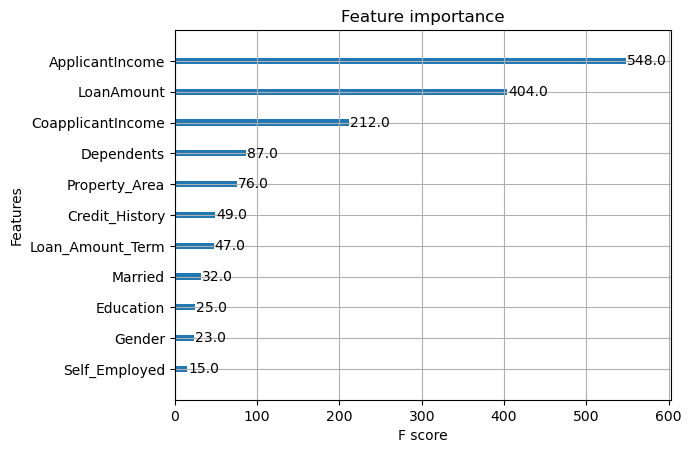

In [13]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [14]:
train_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
sel_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Married', 'Property_Area', 'Education']

x = train_data[sel_cols]
y = train_data.Loan_Status

In [16]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Married,Property_Area,Education
0,0.066226,-0.733932,-0.204521,0.414388,0,2,0
1,-0.136935,-0.011686,-0.204521,0.414388,1,0,0
2,-0.390967,-0.733932,-0.947030,0.414388,1,2,0
3,-0.457885,0.395415,-0.300328,0.414388,1,2,1
4,0.090458,-0.733932,-0.048833,0.414388,0,2,0


In [17]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, stratify = y)
print(f"xtrain size = {xtrain.shape}")
print(f"xtest size = {xtest.shape}")
print(f"ytrain size = {ytrain.shape}")
print(f"ytest size = {ytest.shape}")

xtrain size = (464, 7)
xtest size = (116, 7)
ytrain size = (464,)
ytest size = (116,)


              precision    recall  f1-score   support

           0       0.42      0.94      0.58        65
           1       0.99      0.79      0.88       399

    accuracy                           0.81       464
   macro avg       0.70      0.86      0.73       464
weighted avg       0.91      0.81      0.84       464



<Axes: >

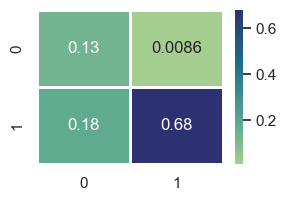

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logistics = LogisticRegression()
logistics.fit(xtrain, ytrain)
train_pred = logistics.predict(xtrain)
print(classification_report(train_pred, ytrain))


revealer = confusion_matrix(train_pred, ytrain)
plt.figure(figsize = (3,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=1)

              precision    recall  f1-score   support

           0       0.47      0.85      0.61        20
           1       0.96      0.80      0.88        96

    accuracy                           0.81       116
   macro avg       0.72      0.83      0.74       116
weighted avg       0.88      0.81      0.83       116



<Axes: >

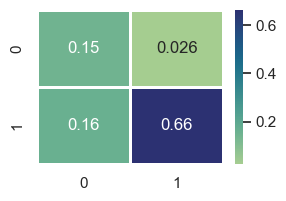

In [19]:
test_pred = logistics.predict(xtest)
print(classification_report(test_pred, ytest))

revealer = confusion_matrix(test_pred, ytest)
plt.figure(figsize = (3,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=1)

In [20]:
import joblib
joblib.dump('loan_data', 'loan_data.pkl') 

['loan_data.pkl']